


# **Q_4 Report, Ali Afshar Degarsi**




In [1]:
# set id of files
test_file_id ='1s09rvQEEX_VoqpdvKZH9oxhFupc0ahUO'
train_file_id = '1YWR6Fo1p_5PrJJkb8kW-oSCTqOfDgHR8'

In [2]:
# import downloader and download datas
!pip install gdown
import gdown

gdown.download(f'https://drive.google.com/uc?id={test_file_id}', 'test.csv', quiet=False)
gdown.download(f'https://drive.google.com/uc?id={train_file_id}', 'train.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1s09rvQEEX_VoqpdvKZH9oxhFupc0ahUO
To: /content/test.csv
100%|██████████| 6.27k/6.27k [00:00<00:00, 11.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YWR6Fo1p_5PrJJkb8kW-oSCTqOfDgHR8
To: /content/train.csv
100%|██████████| 41.5k/41.5k [00:00<00:00, 18.2MB/s]


'train.csv'

# Preprocessing:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.head())

   age  gender     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [5]:
train['gender'] = train['gender'].map({'male':0,'female':1})
test['gender'] = test['gender'].map({'male':0,'female':1})

train['smoker'] = train['smoker'].map({'yes':1,'no':0})
test['smoker'] = test['smoker'].map({'yes':1,'no':0})

print(train.head())

   age  gender     bmi  children  smoker     region      charges
0   19       1  27.900         0       1  southwest  16884.92400
1   18       0  33.770         1       0  southeast   1725.55230
2   28       0  33.000         3       0  southeast   4449.46200
3   33       0  22.705         0       0  northwest  21984.47061
4   32       0  28.880         0       0  northwest   3866.85520


In [6]:
dummies = pd.get_dummies(train['region'], prefix='region', drop_first=True,
                         dtype=int)
train = pd.concat([train,dummies], axis=1).drop('region', axis=1)

dummies = pd.get_dummies(test['region'], prefix='region', drop_first=True,
                         dtype=int)
test = pd.concat([test,dummies], axis=1).drop('region', axis=1)

train.head()

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


In [7]:
X_train = train.drop("charges", axis=1)
y_train = train["charges"]

X_test = test.drop("charges", axis=1)
y_test = test["charges"]


print(X_train.head())

   age  gender     bmi  children  smoker  region_northwest  region_southeast  \
0   19       1  27.900         0       1                 0                 0   
1   18       0  33.770         1       0                 0                 1   
2   28       0  33.000         3       0                 0                 1   
3   33       0  22.705         0       0                 1                 0   
4   32       0  28.880         0       0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0  


Normalizaton:

In [8]:

from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children']

X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]
X_train_categorical = X_train.drop(numeric_cols, axis=1)
X_test_categorical = X_test.drop(numeric_cols, axis=1)

#  init and fit the scaler on TRAINING data
scaler = StandardScaler()
scaler.fit(X_train_numeric)

# transform both training and testing data
X_train_scaled_array = scaler.transform(X_train_numeric)
X_test_scaled_array = scaler.transform(X_test_numeric)

# convert back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled_array, columns=numeric_cols, index=X_train_numeric.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled_array, columns=numeric_cols, index=X_test_numeric.index)

# recombined scaled numeric data with original categorical data
X_train = pd.concat([X_train_scaled_df, X_train_categorical], axis=1)
X_test = pd.concat([X_test_scaled_df, X_test_categorical], axis=1)

print(X_train.head())

        age       bmi  children  gender  smoker  region_northwest  \
0 -1.457217 -0.490267 -0.901378       1       1                 0   
1 -1.527904  0.480877 -0.066769       0       0                 0   
2 -0.821032  0.353487  1.602450       0       0                 0   
3 -0.467596 -1.349738 -0.901378       0       0                 1   
4 -0.538283 -0.328134 -0.901378       0       0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


# Part 1 - without reqularization

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 6699.14


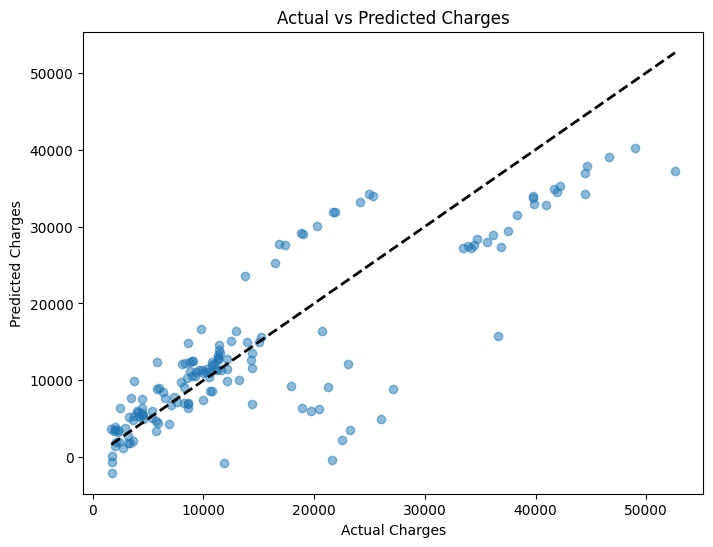

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

# Part 2 - increasing training samples

In [11]:
train_rms_errors = []
test_rms_errors = []
for n_index in range(10,1001,10):
  model.fit(X_train[:n_index][:], y_train[:n_index][:])
  y_train_pred = model.predict(X_train[:n_index][:])

  y_test_pred = model.predict(X_test)

  train_rms_error = np.sqrt(mean_squared_error(y_train_pred, y_train[:n_index][:]))
  test_rms_error = np.sqrt(mean_squared_error(y_test_pred, y_test))

  train_rms_errors.append(train_rms_error)
  test_rms_errors.append(test_rms_error)
  print(f"Number of train samples {n_index}: Train RMSE = {train_rms_error:.2f}, Test RMSE = {test_rms_error:.2f}")

Number of train samples 10: Train RMSE = 3077.69, Test RMSE = 17359.53
Number of train samples 20: Train RMSE = 5016.92, Test RMSE = 8511.00
Number of train samples 30: Train RMSE = 5037.61, Test RMSE = 7445.34
Number of train samples 40: Train RMSE = 5280.19, Test RMSE = 7361.25
Number of train samples 50: Train RMSE = 4908.18, Test RMSE = 7344.53
Number of train samples 60: Train RMSE = 5213.68, Test RMSE = 7017.42
Number of train samples 70: Train RMSE = 5465.20, Test RMSE = 7121.21
Number of train samples 80: Train RMSE = 5311.35, Test RMSE = 7085.30
Number of train samples 90: Train RMSE = 5378.95, Test RMSE = 7008.72
Number of train samples 100: Train RMSE = 5588.68, Test RMSE = 7009.95
Number of train samples 110: Train RMSE = 5829.54, Test RMSE = 6928.93
Number of train samples 120: Train RMSE = 5909.01, Test RMSE = 6924.42
Number of train samples 130: Train RMSE = 5820.14, Test RMSE = 6896.51
Number of train samples 140: Train RMSE = 5807.94, Test RMSE = 6827.93
Number of trai

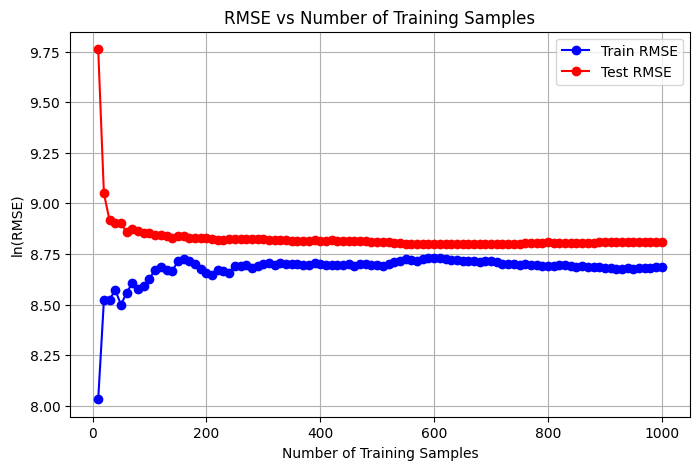

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(10,1001,10), np.log(train_rms_errors), marker='o', label='Train RMSE', color='blue')
plt.plot(range(10,1001,10), np.log(test_rms_errors), marker='o', label='Test RMSE', color='red')
plt.title(f"RMSE vs Number of Training Samples")
plt.xlabel("Number of Training Samples")
plt.ylabel("ln(RMSE)")
plt.legend()
plt.grid(True)
plt.show()

# Part 3 - gradient decent with diffrent size of batches( 1 to full )

In [13]:
from sklearn.linear_model import SGDRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

RANDOM_STATE = 7

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_STATE)

# Define batch sizes to test
batch_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1000]
train_rms_errors = []
val_rms_errors = []


for batch_size in batch_sizes:
    # Initialize the model
    MBGD_model = SGDRegressor(
        loss='squared_error',
        penalty=None,
        fit_intercept=True,
        max_iter=1,
        learning_rate='constant',
        eta0=10e-4,
        random_state=RANDOM_STATE
    )


    # Training history
    train_rmse_history = []
    val_rmse_history = []

    # Training loop
    for epoch in range(70):
        # Shuffle the data
        X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=RANDOM_STATE + epoch)

        # Process mini-batches
        for i in range(0, len(X_train_shuffled), batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]
            MBGD_model.partial_fit(X_batch, y_batch)

        # Calculate RMSE for training and validation sets
        y_train_pred = MBGD_model.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_rmse_history.append(train_rmse)

        y_val_pred = MBGD_model.predict(X_val)
        val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        val_rmse_history.append(val_rmse)

    # Final evaluation on test set
    y_test_pred = MBGD_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Store the final RMSE values
    train_rms_errors.append(train_rmse_history[-1])
    val_rms_errors.append(val_rmse_history[-1])

    print(f"Batch size: {batch_size}")
    print(f"Final training RMSE: {train_rmse_history[-1]:.4f}")
    print(f"Final validation RMSE: {val_rmse_history[-1]:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"W_0: {MBGD_model.intercept_[0]:.4f}")
    for idx, coef in enumerate(MBGD_model.coef_):
        print(f"W_{idx+1}: {coef:.4f}")
    print("-" * 50)


Batch size: 1
Final training RMSE: 5873.1866
Final validation RMSE: 6090.3467
Test RMSE: 6713.4706
W_0: 9270.9998
W_1: 3628.3184
W_2: 2189.2126
W_3: 373.4779
W_4: 324.9980
W_5: 23200.8330
W_6: -559.3929
W_7: -1556.9411
W_8: -1650.0359
--------------------------------------------------
Batch size: 2
Final training RMSE: 5873.1898
Final validation RMSE: 6090.3295
Test RMSE: 6713.5420
W_0: 9270.6075
W_1: 3628.2830
W_2: 2189.0517
W_3: 373.6292
W_4: 324.9080
W_5: 23200.9859
W_6: -559.3963
W_7: -1556.6678
W_8: -1650.4124
--------------------------------------------------
Batch size: 4
Final training RMSE: 5873.1916
Final validation RMSE: 6090.3056
Test RMSE: 6713.5780
W_0: 9270.6148
W_1: 3628.3606
W_2: 2188.7794
W_3: 373.6014
W_4: 324.7714
W_5: 23201.0102
W_6: -559.4671
W_7: -1556.8343
W_8: -1650.5455
--------------------------------------------------
Batch size: 8
Final training RMSE: 5873.1814
Final validation RMSE: 6090.5154
Test RMSE: 6713.3611
W_0: 9271.1218
W_1: 3628.0462
W_2: 2188.950

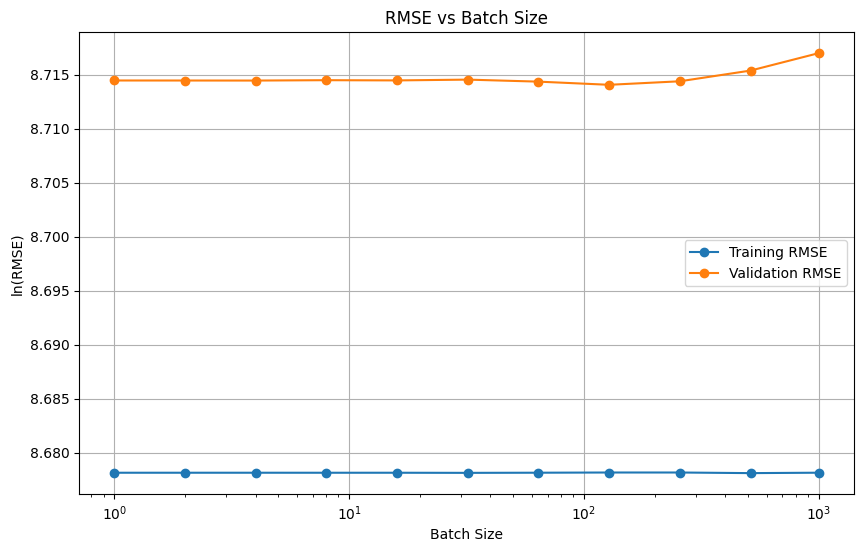

Optimal batch size based on validation RMSE: 128


In [14]:
# Plot the RMSE vs batch size
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, np.log(train_rms_errors), 'o-', label='Training RMSE')
plt.plot(batch_sizes, np.log(val_rms_errors), 'o-', label='Validation RMSE')
plt.xscale('log')
plt.xlabel('Batch Size')
plt.ylabel('ln(RMSE)')
plt.title('RMSE vs Batch Size')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal batch size
optimal_idx = np.argmin(val_rms_errors)
optimal_batch_size = batch_sizes[optimal_idx]
print(f"Optimal batch size based on validation RMSE: {optimal_batch_size}")

# Part 4 - with L2 reqularization and find optimal α

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
rms_errors = []
for alpha in alphas:
  model_l2 = Ridge(alpha=alpha, fit_intercept=True, copy_X=True, max_iter=100000,
                   tol=0.0001, solver='auto', positive=False, random_state=7)
  rms_error = cross_val_score(model_l2, X_train, y_train, cv=5,
                          scoring='neg_root_mean_squared_error').mean()
  rms_errors.append(-rms_error)

alpha_opt = alphas[np.argmin(rms_errors)]

model_l2 = Ridge(alpha=alpha_opt, fit_intercept=True, copy_X=True, max_iter=100000,
                   tol=0.0001, solver='auto', positive=False, random_state=7)
model_l2.fit(X_train, y_train)
l2_y_pred = model_l2.predict(X_test)
l2_rmse = np.sqrt(mean_squared_error(y_test, l2_y_pred))

print(f"Test RMSE when using L2 Regularization with alpha={alpha_opt}: {l2_rmse:.2f}")

Test RMSE when using L2 Regularization with alpha=0.1: 6713.11


In [16]:
train_rms_errors = []
test_rms_errors = []
for alpha in alphas:
  model_l2 = Ridge(alpha=alpha, fit_intercept=True, copy_X=True, max_iter=100000,
                   tol=0.0001, solver='auto', positive=False, random_state=7)
  model_l2.fit(X_train, y_train)
  l2_y_train_pred = model_l2.predict(X_train)
  l2_y_test_pred = model_l2.predict(X_test)

  train_rms_error = np.sqrt(mean_squared_error(l2_y_train_pred, y_train))
  test_rms_error = np.sqrt(mean_squared_error(l2_y_test_pred, y_test))

  train_rms_errors.append(train_rms_error)
  test_rms_errors.append(test_rms_error)

  print(f"alpha={alpha}: Train RMSE = {train_rms_error:.2f}, Test RMSE = {test_rms_error:.2f}")

alpha=0.0001: Train RMSE = 5872.36, Test RMSE = 6712.54
alpha=0.001: Train RMSE = 5872.36, Test RMSE = 6712.55
alpha=0.01: Train RMSE = 5872.36, Test RMSE = 6712.60
alpha=0.1: Train RMSE = 5872.36, Test RMSE = 6713.11
alpha=1: Train RMSE = 5872.83, Test RMSE = 6718.57
alpha=10: Train RMSE = 5912.77, Test RMSE = 6803.85
alpha=100: Train RMSE = 7176.20, Test RMSE = 8265.95
alpha=1000: Train RMSE = 10327.05, Test RMSE = 11466.82
alpha=10000: Train RMSE = 11526.25, Test RMSE = 12537.28


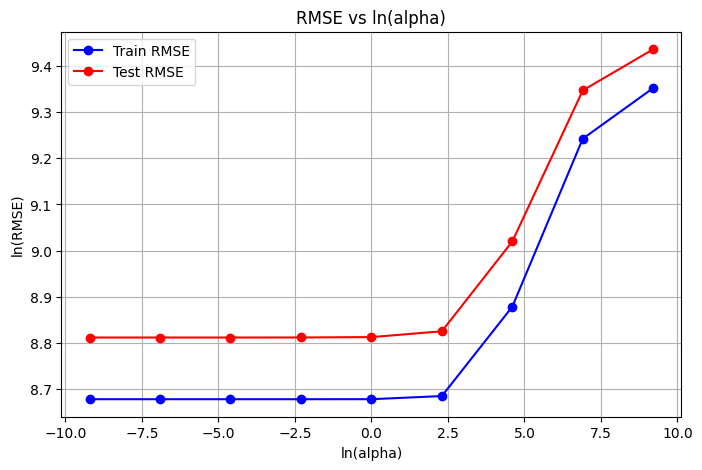

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(np.log(alphas), np.log(train_rms_errors), marker='o', label='Train RMSE', color='blue')
plt.plot(np.log(alphas), np.log(test_rms_errors), marker='o', label='Test RMSE', color='red')
plt.title(f"RMSE vs ln(alpha)")
plt.xlabel("ln(alpha)")
plt.ylabel("ln(RMSE)")
plt.legend()
plt.grid(True)
plt.show()